# Guided Project: Cleaning and Analyzing Employee Exit Surveys from DETE and TAFE Institute in Queensland, Australia

## Introduction

In this project we will clean, and the try to analyze and gather valuable insights from employee exit surveys of **DETE** (Department of Education, Training and Employment - [Link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)) and **TAFE** (Technical and Further Education - [Link](https://data.gov.au/error?errorCode=404&recordType=Dataset&recordId=%22ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e%22) (File has been removed.) ) institutes. 

We will try and answer the below two questions.
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
We will combine the results for both the surveys to answer the above questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

#read in the 'dete' and 'tafe' data files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#print information and first few rows of data 'dete'
print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The Data of DETE institute has 56 columns and 822 rows. Data shows that only column is int type, other columns are either string type (37 columns) or bool type (18 columns). Most of the columns have non-null values above 735. Column Classification has 455 non-null values and column business Unit has just 126 non-null values. The last five columns have either single/double digit non-null values.

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The data of TAFE institute shows that there are 702 rows and 72 columns. Among these 2 columns are of float type and 70 columns are string type. Almost all of these columns have above 430 non-null values except one Main Factor, which has just 113 non-null values.

In [7]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [8]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [9]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Identifying Missing Values and Dropping Unnecessary Columns

We observe that there are values called Not Stated in dete_survey dataframe. These indicate missing values and they are not represented as NaN. We do not need many columns for our analysis and there are same columns with different column-names. We can get rid of these columns.

In [11]:
#we select & look at the columns which are not useful for us 
dete_survey.iloc[:,28:49] 

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,SA,N,D,D,A,N,N,D,A,N,...,A,N,SA,SA,N,D,A,A,A,SA
818,A,SA,D,D,D,A,A,N,A,N,...,A,N,A,N,N,A,A,N,N,N
819,A,A,A,A,A,D,N,A,A,A,...,A,A,A,A,A,A,A,A,N,A
820,A,D,D,A,SD,SD,SD,A,D,SD,...,D,A,A,N,N,N,SD,A,N,A


In [12]:
#starting by reading both datasets

# as dete_survey dataframe cotains some 'Not Stated' values we used set na_values as NAN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [14]:
dete_survey_updated

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [15]:
#Here we look at the columns with multiple answers
tafe_survey.iloc[:, 17:66]

,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,...,InductionInfo. On-line Topic:Did you undertake a Institute Induction?,InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?,InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?,InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.],InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?
0,NaN,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
1,NaN,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
2,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
3,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,-,-,-,-,-,Yes,Yes,Yes,Yes,Yes
4,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,NaN,Neutral,Agree,Agree,Neutral,Disagree,Neutral,Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,Agree,Strongly Agree,Strongly Agree,Neutral,Agree,Agree,Agree,Agree,Agree,...,-,Induction Manual,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
700,NaN,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Agree,Neutral,Neutral,Strongly Agree,...,-,-,Face to Face,-,-,No,No,No,Yes,No


In [16]:
#dropping the redundant columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

In [17]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [18]:
dete_survey['Cease Date']

0      08/2012
1      08/2012
2      05/2012
3      05/2012
4      05/2012
        ...   
817    02/2014
818    01/2014
819    01/2014
820    12/2013
821    12/2013
Name: Cease Date, Length: 822, dtype: object

## Cleaning the Column Names

We observe that many of the columns in both the DataFrames are same but with different column names. These columns are needed for the analysis we are going to perform. As we need to combine these DataFrames for our final analysis, we have to standardize the column names.

Below we are going to rename the column names of the dete_survey_updated data. We will use vectorized String methods to make the required changes to the column names.

In [19]:
dete_survey_updated.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [21]:
tafe_survey_updated.tail()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2
701,6.350730e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,-,Career Move - Self-employment,-,-,...,-,Travel,-,-,Female,26 30,Contract/casual,Administration (AO),3-4,1-2


Below we will rename the columns of tefe_survey_updated data using DataFrame.rename() method.

In [22]:
mapping_dict = {'Record ID': 'id', 'CESSATION YEAR' : 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [23]:
tafe_survey_updated = tafe_survey_updated.rename(mapper=mapping_dict, axis = 1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [24]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [25]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Above we changed the column names for both the data-sets in a way that will ease our future analysis. For updated dete_survey data columns we raplced the space with underscores, stripped the white spaces and converted it to lower case.
We renamed some of the columns in tafe_survey dataframe, so that they correspond to the dete_survey columns. We will use these columns in our analysis.

## Filtering the Data for Necessary Analysis



Our objective here is to segregate the data of 'employees resigning in a short period of time due to some kind of dissatisfaction'. So we are only interested in string Resignation in the column seperation type.

We will only consider the data of (in both dete_survey and tafe_survey), string Resignation in separation type column.

### Filtering of Dete_Survey Dataset

#apply value_count() on separation type and look at the outcome
dete_survey_updated['separationtype'].value_counts()
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [26]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Above we observe that there are other separation types along with resignation type. Among resignation there are three different types.

1) Resignation-Other reasons

2) Resignation-Other employer

3) Resignation-Move overseas/interstate

we will consider only these three for our analysis.

In [27]:
#copy the data and give a new name
dete_survey_updated_copy = dete_survey_updated.copy()

#select  ony 3 resignation types in separation column
dete_1 = dete_survey_updated_copy[dete_survey_updated_copy['separationtype']=='Resignation-Other reasons']
dete_2 = dete_survey_updated_copy[dete_survey_updated_copy['separationtype']=='Resignation-Other employer']
dete_3 = dete_survey_updated_copy[dete_survey_updated_copy['separationtype']=='Resignation-Move overseas/interstate']

dete_resignations = pd.concat([dete_1, dete_2, dete_3], ignore_index=True)
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN


### Filtering of tafe_survey Dataset

We are going to perform the same operation as that of dete_survey dataset on the tafe_survey dataset. First we will check different separation types and filter only the resignation type.

In [28]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [29]:
#copy the data and give a new name
tafe_survey_updated_copy = tafe_survey_updated.copy()

Above we extracted the data only for 'Resignation' type of separation, for both dataframes. And we specifically selected all three types of resignation types in 'dete_survery'. We will have one main reason and it will be resignation for people who left the organization.

In [30]:
tafe_resignations = tafe_survey_updated_copy[tafe_survey_updated_copy['separationtype'] == 'Resignation']
tafe_resignations = tafe_resignations.reset_index()
tafe_resignations.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


We have successfully separated the necessary data from both the datasets for our future analysis.

## Verifying the Data for Logical Inconsistencies

Here we are going to analyze the date columns in both the datasets. In dete_resignations dataframe we will look into column cease_date (last year of person's employment) and column dete_start_date (first year of person's employment). It will not make sense to have years after the current date. Also if we assume people start working in their 20's, it is unlikely that the dete_start_date is before year 1940. In tafe_resignations dataframe we will look into cease_date column.

First we will use Series.value_counts() method to view the unique values for both cease_date and dete_start_date columns.

In [31]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

We extracted only the years from the cease_date column in dete_resignations dataframe.
And we will use vectorized string methods like 'split()' and 'get()' to split the date and exctract the year. then we will convert the data-type to float by using 'astype()' method.

In [32]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

#we will rint the values again and check for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Further we will apply Series.value_counts() and Series_sort_index() methods with ascending = True on cease_date and dete_start_date columns of dete_resignations and cease_date column of tafe_resignations. We are doing this with the intention of viewing the lowest to highest years with their respective counts.

In [33]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

Above we observe that among the cease_date column in dete_resignations dataset, year 2006 is the lowest of all the years. Year 2014 is highest of all. Maximum resignations happened in the year 2013 with 146 entries.

In [34]:
#applying value_counts() & sort_index() methods on dete_start_date column of dete_resignation dataframe
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Above we observe that among the dete_start_date column in dete_resignations dataset, year 1963 is the lowest of all the years. Year 2013 is highest of all. Maximum registrations happened in the year 2011 with 24 entries.

In [35]:
#applying value_counts() & sort_index() methods on cease_date column of tafe_resignation dataframe
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Above we observe that among cease_date column in tafe_resignations dataset, year 2009 is the lowest of all the years. Year 2013 is highest of all. Maximum resignations happened in the year 2011 with 116 entries.

Further we will apply boxplot on the selected three columns in order to identify any outlier/wrong values.

[Text(0, 0, 'Cease Date')]

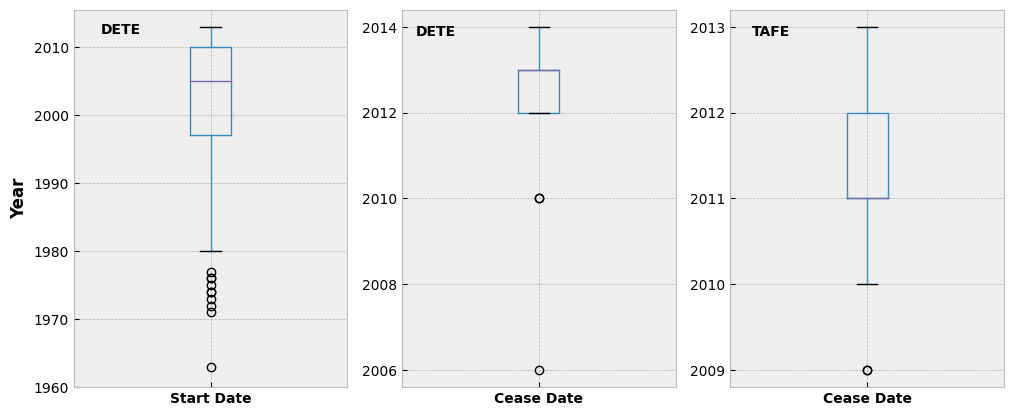

In [36]:
%matplotlib inline
import matplotlib.style as style
style.use('bmh')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.tick_params()
dete_resignations['cease_date'].plot.box(ax=axes[1])
dete_resignations['dete_start_date'].plot.box(ax=axes[0])
tafe_resignations['cease_date'].plot.box(ax=axes[2])

ax1.set_ylabel('Year', weight='bold')
ax2.text(0.55, 2013.8, 'DETE', weight='bold')
ax1.text(0.6, 2012, 'DETE', weight='bold')
ax3.text(0.58, 2012.9, 'TAFE', weight='bold')
ax2.set_yticks([2006, 2008, 2010, 2012, 2014])
ax1.set_yticks([1960, 1970, 1980, 1990, 2000, 2010])
ax3.set_yticks([2009, 2010, 2011, 2012, 2013])
ax2.set_xticklabels(['Cease Date'], weight='bold')
ax1.set_xticklabels(['Start Date'], weight='bold')
ax3.set_xticklabels(['Cease Date'], weight='bold')

### Our observations from the above graph are:-

* From the Dete Start Date it is clear that the year 1963 and the years between 1970 to 1980 are lying outside the box. These values can be considered as outliers.

* For the column Dete Cease Date, two years 2006 and 2010 are lying outside the box and can be considered as outliers.

* For the column Tafe Cease Date, year 2009 is lying outside the box and we can consider it as an outlier.

## Creating a New Column and Comparison of the Data Between the Two DataFrames

Since we extraxted the years from the dete_resignations we and years from tafe_resignations, we will use these to create a new column. In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In order to create a service column we will subtract the dete_start_date column from the cease_date column and name the new column institute_service.

In [37]:
tafe_resignations['institute_service']

0       NaN
1       3-4
2      7-10
3       3-4
4       3-4
       ... 
335     5-6
336     1-2
337     NaN
338     5-6
339     3-4
Name: institute_service, Length: 340, dtype: object

In [38]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

0       7.0
1      18.0
2       3.0
3      14.0
4       NaN
       ... 
306     NaN
307     NaN
308     2.0
309     5.0
310     NaN
Name: institute_service, Length: 311, dtype: float64

In [39]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

## Identifying Dissatisfied Employees

In here we identify the employees who resigned because of dissatisfaction in their jobs.

First we will look into tafe_resignations dataset. Here we list two columns which catogorize the employees as dissatisfied.

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

Below we will apply Series.value_counts() method to look at the values of a perticular column in the dataset.

In [40]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

Above we observe that among 332, only 55 resignations are due to *Dissatisfaction* in the jobs

In [41]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Above we observed that among 332, 62 resignations are due to *Job Dissatisfaction.*

Additionally, we will define a function *update_vals().* This function will return *np.nan* if the value is 'NaN', return *False* if the value is "-" and return *True* if anything else.

In [42]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True    

Below we will pass *update_vals()* functions on **Contributing Factors. Dissatisfaction, Contributing Factors. Job Dissatisfaction** columns using *df.applymap()* method.

In [43]:
tafe_Factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

tafe_resignations[tafe_Factors] = tafe_resignations[tafe_Factors].applymap(update_vals)

We apply df.any() method on the colums of *tafe_factors*, in order to create a new column called *dissatisfied* in the *tafe_resignations* dataframe. After application, the column wil contain following values:

* `True`: indicates a person resigned because they were dissatisfied with the job
* `False`: indicates a person resigned becaused of the reason other than dissatisfaction with the job
* `NaN`: indicates a value missing

In [44]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_Factors].any(axis=1, skipna=False)
tafe_resignations.tail()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
335,696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6,False
336,697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,...,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,False
337,698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
338,699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,...,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,False
339,701,6.350730e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,-,Career Move - Self-employment,-,...,Travel,-,-,Female,26 30,Contract/casual,Administration (AO),3-4,1-2,False


We will perform the same procedure as earlier on the *dete__resignations* dataset. First we will list all the columns corresponding to *'Job Dissatisfaction'* in a variable called *dete_Factors.* Then apply *df_any()*  method on those rows and assign the results to a new column *dissatisfied* in the *dete_resignations* dataset.

**Below we list all the rows correspondging to the Job Dissatisfaction in the dete_resignations dataset:**

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload


In [45]:
dete_Factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_Factors].any(axis=1, skipna=False)

We will copy the dataset with *df.copy()* method and give it a new name in order to avoid getting **SettingWithCopy** Warning message.

In [46]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [47]:
print(tafe_resignations['dissatisfied'].value_counts())
dete_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64


False    162
True     149
Name: dissatisfied, dtype: int64

In [48]:
tafe_resignations_up.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [49]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True


We have successfully separated the resignations due to *Job DIssatisfaction* in both datasets and listed them in a new column called *dissatisfied*. We will use this new column later in our analysis.

## Combining the Two DataFrames for Analysis

 For our analysis we need to aggregate the data according to the *institute_service*  column in both the dataframes. This column contains time duration of employment. For this first we need to join the two dataframes as our analysis should include both and applicable for both at the same time. After joining these we will keep only those columns with sufficient data points required for our analysis.
 
Below we will create one more column called *institute* in both the dataframes which specifies the institute name, i.e. *TAFE* or *DETE.* This will help us distinguish between the two datasets once the combine them.

In [50]:
dete_resignations_up['institute'] = 'DETE'
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False,DETE
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,800,Resignation-Move overseas/interstate,NaN,1995.0,NaN,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,NaN,False,DETE
307,804,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,DETE
308,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0,False,DETE
309,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True,DETE


In [51]:
tafe_resignations_up['institute'] = 'TAFE'
tafe_resignations_up.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [52]:
tafe_resignations_up['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Our dataframes contain uneven number of rows and columns, thus we combined the two dataframes using the pd.concat() method, as it stacks the datasets vertically. We also applied the df.reset_index() which resets the indext of our new dataframe combined.

In [53]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined = combined.reset_index()
combined

,level_0,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.300000e+01,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.700000e+01,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,335,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,5-6
647,336,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,1-2
648,337,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,NaN
649,338,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,...,-,-,False,False,-,-,-,Other,-,1-2


We will remove all columns which have less than 500 non null values by using the *pd.dropna()* method with *thresh* paramenter equal to 500.

In [54]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated

,level_0,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,3,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE
4,4,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE
...,...,...,...,...,...,...,...,...,...,...,...
646,335,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,336,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,337,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,338,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


In the *combined_updated* dataset we now have *651 rows* and only *11 columns* which will ease our further anaysis.

## Cleaning and Categorizing the Institute Service Column

Now that we have a single dataset, we can perform some analysis. We will consider the *institute_service* and try and cleaning it up. 

In [55]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


As seen above, ths column contains values in different forms so cleaning will be difficult. The values of the column belong to the *int64* data-type. We will convert data-type to *string* so that we can apply vectorized string methods on these.

In [56]:
combined_updated.loc[:,'institute_service'] = combined_updated.loc[:,'institute_service'].astype('str')
combined_updated['institute_service']

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       7.0
1      18.0
2       3.0
3      14.0
4       nan
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object

With the next block of code we will apply *vectorized string methods* on the data and modify them to a required format.
First we will apply *Series.str.replace()* method on the data and convert *'Less than 1 year'* to *'1',* *'More than 20 years'* to *20* and *'.'* to *'-'* respectively. Then we will apply *Series.str.split()* method and split *'-'* and select the 0th value using *Series.str.get()* method.
Finally, we will convert the data-type to *float* for further analysis.

In [57]:
combined_updated.loc[:,'institute_service'] = combined_updated.loc[:,'institute_service'].str.replace("Less than 1 year", '1')
combined_updated.loc[:,'institute_service'] = combined_updated.loc[:,'institute_service'].str.replace('More than 20 years','20')
combined_updated.loc[:,'institute_service'] = combined_updated.loc[:,'institute_service'].str.replace('.','-')

combined_updated.loc[:,'institute_service'] = combined_updated.loc[:,'institute_service'].str.split('-').str.get(0)
combined_updated['institute_service'].astype(float)

0       7.0
1      18.0
2       3.0
3      14.0
4       NaN
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

In [58]:
combined_updated['institute_service'].value_counts().sort_index(ascending=True)

0       20
1      159
10       6
11      30
12       6
13       8
14       6
15       7
16       5
17       6
18       5
19       3
2       14
20      17
21       3
22       6
23       4
24       4
25       2
26       2
27       1
28       2
29       1
3       83
30       2
31       1
32       3
33       1
34       1
35       1
36       2
38       1
39       3
4       16
41       1
42       1
49       1
5       56
6       17
7       34
8        8
9       14
nan     88
Name: institute_service, dtype: int64

In the above cell we performed *Series.value_counts()* method on the *institute_service* column in order to look at different kinds of data and its counts. We observe that the values range from 0 to 49  and also there are *nan* values. For sorting these values we will define a function called *map_vals().* This functions will map the values into four different type of categories as listed below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company >= 3 <= 6
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We will also address the *NaN* values in our function

In [59]:
def map_vals(val):
    if float(val) < 3:
        return "New: Less than 3 years at a company"
    elif float(val) <= 6:
        return "Experienced: 3-6 years at a company"
    elif float(val) <= 10:
        return "Established: 7-10 years at a company"
    elif float(val) >= 11:
            return "Veteran: 11 or more years at a company"
    elif pd.isnull(val):
        return np.nan
    

Below we will apply the *map_vals* function on the *institute_service* column using the *Series.apply()* method and store the result in a new column called *service_cat.* We will also study the new column by using the *Series.value_counts()* method.

In [60]:
combined_updated.loc[:,'service_cat'] = combined_updated.loc[:,'institute_service'].apply(map_vals)
combined_updated['service_cat'].value_counts(dropna=True)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
Established: 7-10 years at a company       62
Name: service_cat, dtype: int64

We have successfully cleaned and categorized the *institute_service* column. New data has been categorized and put in a new column called *service_cat.*  Now we can continue with the main analysis of the dataframe.

## Performing the Initial Analysis of Calculating the Percentage of Dissatisfied Employees

We will do our first peace of analysis to calculate the percentage of dissatisfied employees in all the categories of *'service_cat'* column. The *dissatisfied* column consists of Boolean values, meaning they are either *True* or *False.* We also need to find out if there are any *NaN* values. For this purpose we will use *Series.value_counts()* method on the column with *dropna* parameter equal to *False* which will give us the count of *NaN* values as well.

In [61]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We see that the number of *False* values is 403, and the number of *True* values is 240, while *NaN* values are 8.
As *False* values are almost double the number of *True* values we will replace the *NaN* values with *False* values using the *Series.fillna()* method .

In [62]:
combined_updated['dissatisfied'].fillna(value=False).value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

Now we are left with only *True* or *False* values in the *dissatisfied* column of the dataframe. We will apply *DataFrame.pivot_table()* method in order to calculate the percentage of dissatisfied employees in each *service_cat* group. We will name this table *combined_percent*.

In [63]:
combined_percent = combined_updated.pivot_table(values='dissatisfied', index='service_cat', aggfunc=lambda x: np.mean(x)*100)

combined_percent

,dissatisfied
service_cat,
Established: 7-10 years at a company,51.612903
Experienced: 3-6 years at a company,34.302326
New: Less than 3 years at a company,29.533679
Veteran: 11 or more years at a company,48.529412


**Below we list the percentages of dissatisfied people in all the categories from highest to lowest:**

1. Percentage of dissatisfied employees in the Established category is ~52%.

2. Percentage of dissatisfied employees in the Veteran category is ~49%.

3. Percentage of dissatisfied employees in the Experience category is ~ 34%.

4. Percentage of dissatisfied employees in the New category is ~29%.

Below we will plot the pivot table using a horizontal bar graph, this will illustrate better what we see and help us with the analysis.

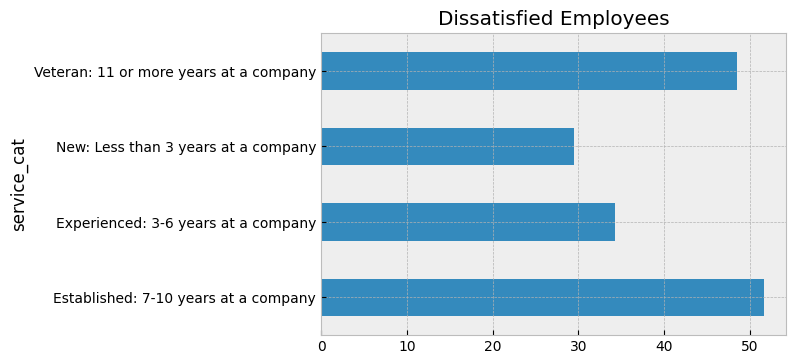

In [64]:
combined_percent.plot(kind='barh', legend=False, title='Dissatisfied Employees')

[]

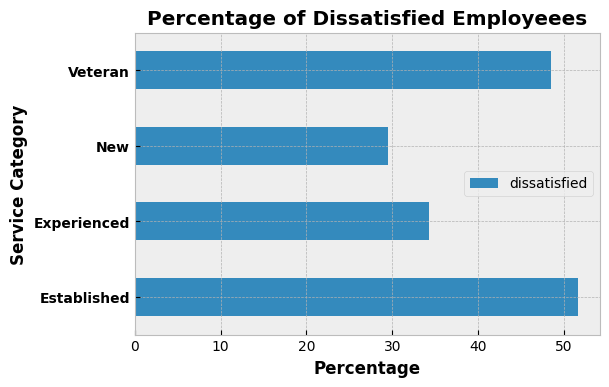

In [65]:
combined_percent.plot(kind='barh')
plt.title('Percentage of Dissatisfied Employeees', weight='bold')
plt.xlabel('Percentage', weight='bold')
plt.ylabel('Service Category', weight='bold')
labels = ['Established', 'Experienced', 'New', 'Veteran']
plt.yticks([0, 1, 2, 3], labels, weight='bold')
plt.plot()

## Handling the Missing values and Conclusion of Dissatisfied Employeees in Each Career Stage

We are going to check the *missing values* in the *service_cat* column. And figure out how to handle these values.

In [66]:
combined_updated['service_cat'].value_counts(dropna=False)

New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
NaN                                        88
Established: 7-10 years at a company       62
Name: service_cat, dtype: int64

We observe that there are *88 missing values* among the *service_cat* column. As this is a significant number we will try to incorporate appropriate values instead of dropping these. We will use the *Serie.fillna()* method with *ffill*. This method would fill all the missing values with the first non-missing value that occurs before it. We calculated that the distribution of values before and after using the *ffill* method is the same

In [67]:
combined_updated['service_cat'].fillna(method='ffill', inplace=True)
combined_updated.loc[:,'service_cat'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



New: Less than 3 years at a company       221
Experienced: 3-6 years at a company       205
Veteran: 11 or more years at a company    153
Established: 7-10 years at a company       72
Name: service_cat, dtype: int64

As seen from the above we have filled all missing values with appropriate values. We will apply *df.pivot_table()* and aggregate the dissatisfied values according to the *service_cat* column

In [68]:
comb_perc = combined_updated.pivot_table(values='dissatisfied', index='service_cat', aggfunc=[sum, lambda x: np.mean(x)*100])
comb_perc

,sum,<lambda>
,dissatisfied,dissatisfied
service_cat,,
Established: 7-10 years at a company,36,51.428571
Experienced: 3-6 years at a company,70,34.653465
New: Less than 3 years at a company,65,29.680365
Veteran: 11 or more years at a company,69,45.394737


**Below we will list the number of dissatisfied people in each of the service categories in descending order**

1. In the Established category 36 employees are dissatisfied among 72 employees i.e. ~51%.


2. In the Veteran category 65 employees are dissatisfied among 153 employees i.e. ~45%.


3. In the Experienced service category 70 employees are dissatisfied among 205 employees i.e. ~34%.


4. In the New category 65 employees are dissatisfied among 221 employees i.e. ~29%.

We will plot the above table for a better understanding of the analysis.

([<matplotlib.axis.YTick at 0x7f8386a99d30>,
 [Text(0, 0, 'Established'),
  Text(0, 0, 'Experienced'),
  Text(0, 0, 'New'),
  Text(0, 0, 'Veteran')])

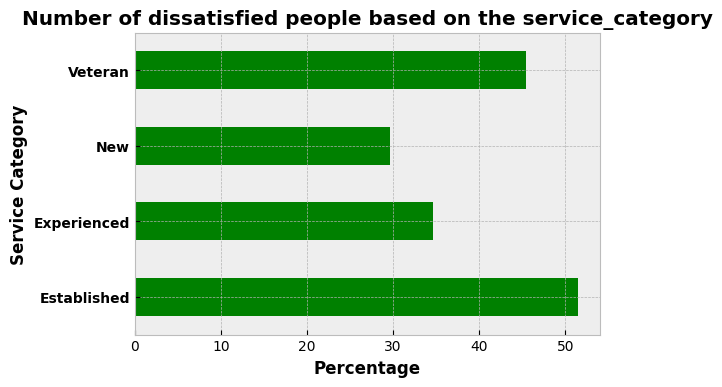

In [69]:
comb_perc['<lambda>'].plot(kind='barh', color='green', legend=False)
plt.title('Number of dissatisfied people based on the service_category', weight='bold')
plt.xlabel('Percentage', weight='bold')
plt.ylabel('Service Category', weight='bold')
labels = ['Established', 'Experienced', 'New', 'Veteran']
plt.yticks([0, 1, 2, 3], labels, weight='bold')


## Cleaning the Age Column and Studying Resignation due to Dissatisfaction in Each Age Group

Next, step in our analysis is going to be cleaning the *age* column and we will calculate th number of dissatisfied employees among different age groups.
Below we will look at the *age* column using the *Series.value_counts()* method.

In [70]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We see that values in the age group are not unified. We would need to convert these data points into same kind of data before analysing.
Thus, we will convert all the value in the column into a string type by applying vectorized string methods.

In [71]:
combined_updated.loc[:,'age'] = combined_updated['age'].str.replace('  ', '-')
combined_updated.loc[:,'age'] = combined_updated['age'].str.replace('56 or older', '56')
combined_updated.loc[:,'age'] = combined_updated['age'].str.replace('61 or older', '61')
combined_updated.loc[:,'age'] = combined_updated['age'].str.replace('20 or younger', '20')
combined_updated.loc[:,'age'] = combined_updated['age'].str.split('-').str.get(-1)
#ombined_updated.loc[:,'age'] = combined_updated.loc[:,'age'].astype('float')
combined_updated['age'].value_counts()

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



45    93
50    81
40    73
55    71
30    67
25    62
35    61
56    29
60    26
61    23
20    10
Name: age, dtype: int64

In [72]:
combined_updated['age'].value_counts(dropna=False).sort_index(ascending=True)


20     10
25     62
30     67
35     61
40     73
45     93
50     81
55     71
56     29
60     26
61     23
NaN    55
Name: age, dtype: int64

Now the data is in the desired form. We can proceed with further analysis. Here we will define a function called *map_age()* with a single parameter *val.* This fuction seggregates the age of employees into different categories. Below is a list different age-categories:

* Very Young: Less than 20 years old
* Young: 21 - 40 years old
* Middle Aged: 41 - 59 yars old
* Senior: More than 60 years old

In [73]:
# defining a function map_age() with val as a single parameter

def map_age(val):
    if float(val) <= 20:
        return 'Very Young: Less than 20 years old'
    elif float(val) <= 40:
        return 'Young: 21 - 40 years old'
    elif float(val) <= 59:
        return 'Middle Aged: 41 - 59 years old'
    elif float(val) >= 60:
        return 'Senior: More than 60 years old'
    elif float(val):
        return np.nan

In [74]:
#we will apply the above function using Series.apply() method.
#crate a new column and name it "age_cat"
combined_updated['age_cat'] = combined_updated.loc[:,'age'].apply(map_age)
combined_updated['age_cat'].value_counts(dropna=False)

<ipython-input-74-3fc3c5fbb370>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Middle Aged: 41 - 59 years old        274
Young: 21 - 40 years old              263
NaN                                    55
Senior: More than 60 years old         49
Very Young: Less than 20 years old     10
Name: age_cat, dtype: int64

We continue to see the *55 missing values* in the *age* column. We will use the *fillna()* method with the *ffill* option, this will fill the missing values with last non-missing value that occured before it.

In [75]:
combined_updated['age_cat'].fillna(method='ffill', inplace=True)
combined_updated['age_cat'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Middle Aged: 41 - 59 years old        304
Young: 21 - 40 years old              286
Senior: More than 60 years old         50
Very Young: Less than 20 years old     11
Name: age_cat, dtype: int64

Now that we have different age categories, and since missing values have been filled. We will go ahead and aggregate the data using the *df.pivot_table()* method and determine the number of dissatisfied employees in each group.

In [76]:
age_perc = combined_updated.pivot_table(values='dissatisfied', index='age_cat', aggfunc=[sum, lambda x: np.mean(x)*100])
age_perc

,sum,<lambda>
,dissatisfied,dissatisfied
age_cat,,
Middle Aged: 41 - 59 years old,110,36.666667
Senior: More than 60 years old,27,54.000000
Very Young: Less than 20 years old,3,27.272727
Young: 21 - 40 years old,100,35.460993


Calculated are the umbe of dissatisfied employees based on their age group. We list out findings below from highest to lowest:

1. *Senior* category has 27 dissatisfied employees among 50 employees i.e. ~54%.


2. *Middle Aged* category has 110 employees who are dissatisfied among 304 employees i.e. ~36%.


3. *Young* category has 100 dissatisfied employees aomng 286 employees i.e. ~35%.


4. *Very Young* category where there are only 3 dissatisfied employees among 11 employees ~27%.

We will plot this table for a better understanding of the analysis.

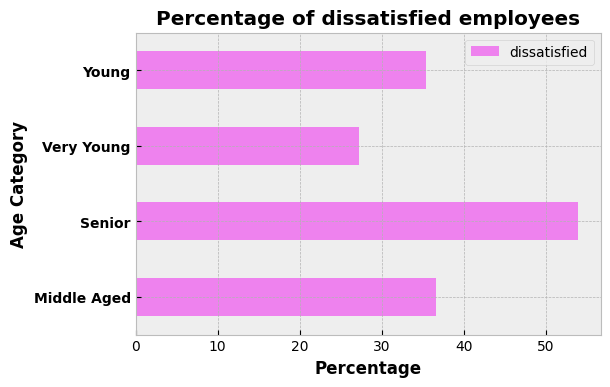

In [77]:
age_perc['<lambda>'].plot(kind='barh', color='violet', legend=True)
plt.title('Percentage of dissatisfied employees', weight='bold')
plt.xlabel('Percentage', weight='bold')
plt.ylabel('Age Category', weight='bold')
labels = ['Middle Aged', 'Senior', 'Very Young', 'Young']
plt.yticks([0, 1, 2, 3], labels, weight='bold')
plt.show()

## Analyzing the Dissatisfied Employeed Separately

### Analysis of Dissatisfied Employees in the DETE Survey

We will look at the *dete_resignations_up* dataframe.


In [78]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False,DETE
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE


We just need the *intitute_service*  and *dissatisfied* columns for our analysis. We will apply *Series.value_counts()* on the *institue_service* column and take a look at the values.

In [79]:
dete_resignations_up['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
12.0     6
17.0     6
18.0     5
16.0     5
24.0     4
11.0     4
23.0     4
32.0     3
19.0     3
21.0     3
39.0     3
28.0     2
30.0     2
36.0     2
25.0     2
26.0     2
41.0     1
33.0     1
29.0     1
35.0     1
31.0     1
27.0     1
34.0     1
38.0     1
49.0     1
42.0     1
Name: institute_service, dtype: int64

Values are in the desired format, and we can apply *map_vals(val)* function on the *institute_service* column. We will name this new column *Service_cat* and check the value count using the *Series.value_counts()* method.

In [80]:
dete_resignations_up['service_cat'] = dete_resignations_up['institute_service'].apply(map_vals)
dete_resignations_up['service_cat'].value_counts(dropna=False)

Veteran: 11 or more years at a company    100
Experienced: 3-6 years at a company        76
New: Less than 3 years at a company        56
Established: 7-10 years at a company       41
NaN                                        38
Name: service_cat, dtype: int64

Above table has *38* missing values. We will use *Series.fillna() with method = ffill* to fill the missing values

In [81]:
dete_resignations_up['service_cat'].fillna(method='ffill', inplace=True)
dete_resignations_up['service_cat'].value_counts(dropna=False)

Veteran: 11 or more years at a company    113
Experienced: 3-6 years at a company        94
New: Less than 3 years at a company        61
Established: 7-10 years at a company       43
Name: service_cat, dtype: int64

In [82]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Below we will apply *df.pivot_table()* in order to calculate the percentage of dissatisfied employees among each service category.

In [83]:
dete_percent = dete_resignations_up.pivot_table(values='dissatisfied', index='service_cat', aggfunc=[sum, lambda x: np.mean(x)*100])
dete_percent

,sum,<lambda>
,dissatisfied,dissatisfied
service_cat,,
Established: 7-10 years at a company,26.0,60.465116
Experienced: 3-6 years at a company,42.0,44.680851
New: Less than 3 years at a company,22.0,36.065574
Veteran: 11 or more years at a company,59.0,52.212389


We can note the following distribution among categories in the *dete institute survey:

* *Established Category* has ~60% of the dissatisfied employees.


* *Experienced Category* has ~40% of dissatisfied employees.


* *New Category* has ~36% of dissatisfied employees.


* *Veteran Category* has ~50% of dissatisfied employees.

### Ansalysis of Dissatisfied Employees in the TAFE Survey

Firs we will take a look at the *tafe_resignations* dataframe. We will also take a look at the value counts of *institute_service* column of the dataframe. 

In [84]:
tafe_resignations_up.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [85]:
tafe_resignations_up['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

There are 52 missing values and also values are not in the desired format.
For this we will apply *vectorized string methods* on the *institute_service* column. We will start by converting the data into a string data-type.

In [86]:
tafe_resignations_up['institute_service'].astype(str)

0       nan
1       3-4
2      7-10
3       3-4
4       3-4
       ... 
335     5-6
336     1-2
337     nan
338     5-6
339     3-4
Name: institute_service, Length: 340, dtype: object

In [87]:
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].str.replace('More than 20 years', '20')
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].str.replace('Less than 1 year', '1')
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].str.split('-').str[-1]

tafe_resignations_up['institute_service'].astype('float')
tafe_resignations_up['institute_service'].value_counts(dropna=False)

1      73
2      64
4      63
NaN    50
20     36
6      33
10     21
Name: institute_service, dtype: int64

We can now apply the *map_vals(val)* function on the *institute_service* column and name the new column *service_cat.* We will then count the values of each category.

In [88]:
tafe_resignations_up['service_cat'] = tafe_resignations_up['institute_service'].apply(map_vals)
tafe_resignations_up['service_cat'].value_counts(dropna=False)

New: Less than 3 years at a company       137
Experienced: 3-6 years at a company        96
NaN                                        50
Veteran: 11 or more years at a company     36
Established: 7-10 years at a company       21
Name: service_cat, dtype: int64

Looking at the table above we see that there are *50* missing values. We will use the *Series.fillna()* with the *ffill* method in order to fill in the missing values.

In [89]:
tafe_resignations_up['service_cat'].fillna(method='ffill', inplace=True)
tafe_resignations_up['service_cat'].value_counts(dropna=False)

New: Less than 3 years at a company       160
Experienced: 3-6 years at a company       110
Veteran: 11 or more years at a company     40
Established: 7-10 years at a company       29
NaN                                         1
Name: service_cat, dtype: int64

We will also check if there are any missing values in the *dissatisfied* column. We will fill in the missing values with a *bollean value* which has a *maximum number of counts*

In [90]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [91]:
tafe_resignations_up['dissatisfied'].fillna(value=False).value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

Further, we will aggregate the data from columns *dissatisfied* and *service_category* using the df.pivot_table() method in order to find the percentage of dissatisfied employees in each service category

In [92]:
tafe_percent = tafe_resignations_up.pivot_table(values='dissatisfied', index='service_cat', aggfunc=[sum, lambda x: np.mean(x)*100])
tafe_percent

,sum,<lambda>
,dissatisfied,dissatisfied
service_cat,,
Established: 7-10 years at a company,10,37.037037
Experienced: 3-6 years at a company,28,26.168224
New: Less than 3 years at a company,43,27.215190
Veteran: 11 or more years at a company,10,25.641026


We see that in the *tafe institute survey:

* *Established Category* has ~37% of dissatisfied employees


* *Experienced Category* has ~26% of dissatisfied employees.


* *New Category* has ~27% of dissatisfied employees.


* *Veteran Category* has ~25% dissatisfied employees.

Clearly, among the *dete institute* and *tafe institute* employee exit survey, the former has highest number of dissatisfied employees in all the categories. We can visualize the results using *bar* plots of pivot tables of both tables.

Text(0.5, 0, 'Service Category')

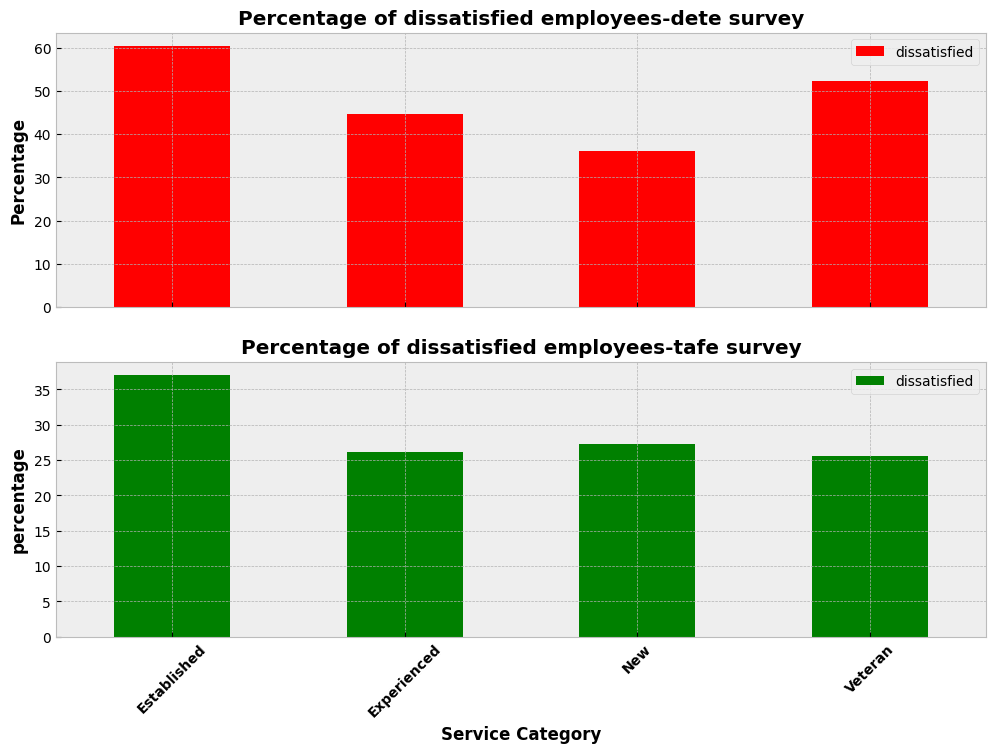

In [93]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

dete_percent['<lambda>'].plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Percentage of dissatisfied employees-dete survey', weight='bold')
axes[0].set_ylabel('Percentage', weight='bold')
axes[0].set_xticklabels('')
axes[0].set_xlabel('')

tafe_percent['<lambda>'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Percentage of dissatisfied employees-tafe survey', weight='bold')
axes[1].set_ylabel('percentage', weight='bold')
axes[1].set_xticklabels(['Established', 'Experienced', 'New', 'Veteran'], rotation=45, weight='bold')
axes[1].set_xlabel('Service Category', weight='bold')

## Conclusions

In this project we cleaned and analyzed exit surveys from employees of **DETE** and **TAFE** institutes in *Quessnsland, Australia.* We now should be able to answer two distinct querries that were asked in the beginning of the section. We will answer one after the other.

**Addressing the first querry:**

* **Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction?**
    
    if we look at the analysis on the *service category* column of the combined dataset carefully, among the New category (less than 3 years of service) only **~29%** of employees and among.
    Experienced category (3 to 6 years of service) only **~34%** of employees have resigned due to some kind of dissatisfaction. Eventhough this percentage is not remarkable, it is not negligible either.


* **What about the employees who have been there longer?**

    Among the Established category (7 to 10 years of service), **~52%** of employees and among. 
    Veteran category (11 or more years of service) only **~49%** of employees resigned due to some kind of dissatisfaction. This is almost half of the employees among these categories. This percentage is remarkable. 
    
    **Thus, we state that resignation due to some kind of dissatisfaction among long term employees is higher than the short term employees.**

**Addressing the second querry:**

* **Are younger employees resigning due to some kind of dissatisfaction? What about the older employees?**

    Among very young category (less than 20 years of age), **~27%** of employees have resigned due to some kind of dissatisfaction. Among Young category (20 to 40 years of age), **~35%** of empliyees and among. 
    Middle Aged category (40 to 60 years old),**~36%** of employees havre resigned due to some kind of dissatisfaction. The highes resignation is among Senior category (more than 60 years of age)  i.e. **~54**. This is comparatively higher than the other categories.
    **From our analysis we can conclude that the resignation among senior emplyees is higher than the younger employees due to some kind of dissatisfaction.**


* Separate analysis on the two datasets reveal that among all the categories *Established* (7 to 10 years of experience) has higher resignation due to dissatisfaction in both the datasets. The percentage of dissatisfied employees are higher in *Dete Institute Employee Exit Survey* compared to *Tafe Institute Employees Exit Survey* in all the categories.